# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x^*$)=0$ nazywamy *pierwiastkami*.

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 1.        +0.j          2.        +0.j          3.        +0.j
  3.99999999+0.j          5.00000012+0.j          5.99999985+0.j
  6.99999205+0.j          8.00009044+0.j          8.99951415+0.j
 10.0011488 +0.j         11.00243859+0.j         11.97024871+0.j
 13.16907204+0.j         13.68203882+0.j         15.46259068-0.47408602j
 15.46259068+0.47408602j 17.58314188-0.3264018j  17.58314188+0.3264018j
 19.10182347+0.j         19.98216783+0.j        ]

[ 1.        +0.j          2.        +0.j          3.        +0.j
  4.        +0.j          4.99999973+0.j          6.00000553+0.j
  6.9999398 +0.j          8.00040588+0.j          8.99835214+0.j
 10.00252278+0.j         11.01538826+0.j         11.89449996+0.j
 13.33892191-0.47099582j 13.33892191+0.47099582j 15.43262678-0.91336185j
 15.43262678+0.91336185j 17.66188819-0.77097327j 17.66188819+0.77097327j
 19.29227195+0.j         19.92974019+0.j        ]

[ 1.        +0.j         

c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[ 1.        +0.j          2.        +0.j          3.        +0.j
  3.99999999+0.j          5.        +0.j          6.0000012 +0.j
  6.99998411+0.j          8.00010463+0.j          8.99967141+0.j
  9.99947254+0.j         11.01203771+0.j         11.93788898+0.j
 13.39999134-0.17882152j 13.39999134+0.17882152j 15.45632468-0.63950885j
 15.45632468+0.63950885j 17.6090187 -0.49243931j 17.6090187 +0.49243931j
 19.14819369+0.j         19.97197629+0.j        ]

[ 1.        +0.j          2.        +0.j          3.        +0.j
  4.00000002+0.j          4.99999965+0.j          6.00000347+0.j
  6.99997627+0.j          8.00011446+0.j          8.99968047+0.j
  9.99958392+0.j         11.0105911 +0.j         11.94338636+0.j
 13.40277887-0.13150325j 13.40277887+0.13150325j 15.45523268-0.62394324j
 15.45523268+0.62394324j 17.60632685-0.48231427j 17.60632685+0.48231427j
 19.14545339+0.j         19.97253407+0.j        ]

[ 1.          2.          3.          4.          4.99999975  6.00000625
  6.99992804 

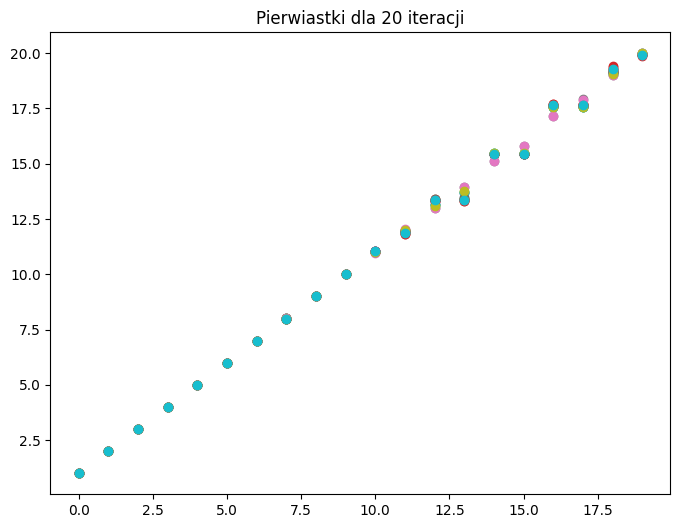

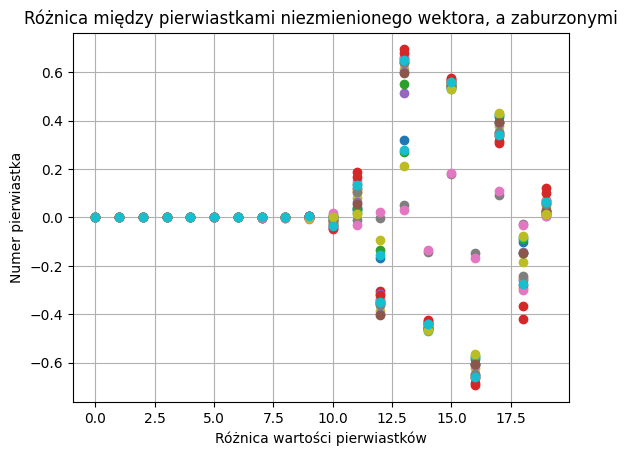

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from main import roots_20 

A = np.arange(1,21)
print (A)
A_wsp = P.polyfromroots(A)

rozw = A
pierwiastki = []
roznica = []
for i in range(20):
    wsp, pierw = roots_20(A_wsp)
    pierwiastki.append(pierw)
    roznica.append(rozw - pierw)

plt.figure(figsize=(8, 6))
for roots in pierwiastki:
    print (roots)
    print ()
    plt.plot(roots, 'o')
plt.title('Pierwiastki dla 20 iteracji')
plt.show()
for e in roznica:
    plt.plot(e, 'o') 
plt.title('Różnica między pierwiastkami niezmienionego wektora, a zaburzonymi')
plt.xlabel('Różnica wartości pierwiastków')
plt.ylabel('Numer pierwiastka')
plt.grid(True)
plt.show()

Najbardziej wrażliwy na zaburzenia jest trzynasty pierwiastek. 

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

Macierz frobeniusa dla wektora W: 
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Wartości własne macierzy wyznaczone za pomocą eigvals: 
[1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]
Wartości własne wyznaczone za pomocą schura:
[1.01896519+0.00796366j 1.00763966+0.01898228j 0.9920388 +0.01868756j
 1.01898218-0.00791991j 0.98129171+0.00764208j 0.98131261-0.00768975j
 1.0076834 -0.01896141j 0.99208646-0.01870452j]
Pierwiastki wielomian wyznaczone za pomocą polyroots: 
[0.98453434+0.j         0.98909686-0.01095323j 0.98909686+0.01095323j
 1.00005964-0.0154

c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


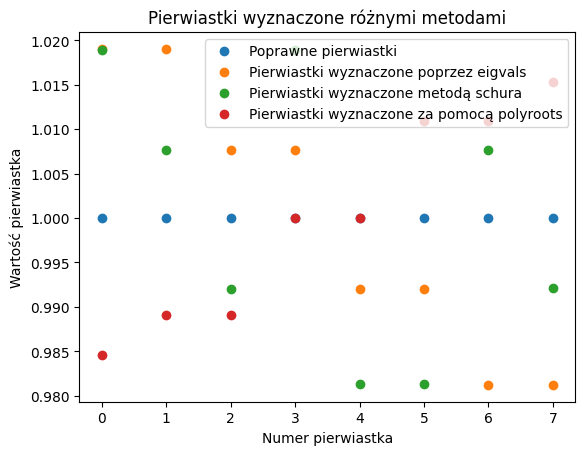

In [13]:
from main import frob_a
#1
W = np.array([1, -8, 28, -56, 70, -56, 28, -8, 1])
matrix_frobenius, matrix_eigvals, Q, roots = frob_a(W)
print ("Macierz frobeniusa dla wektora W: ")
print (matrix_frobenius)
#2
print ("Wartości własne macierzy wyznaczone za pomocą eigvals: ")
print (matrix_eigvals)

#3
print("Wartości własne wyznaczone za pomocą schura:")
print(Q)


#4
print ("Pierwiastki wielomian wyznaczone za pomocą polyroots: ")
print (roots)

rozw = [1,1,1,1,1,1,1,1]
plt.plot(rozw,'o',label = 'Poprawne pierwiastki')
plt.plot(matrix_eigvals,'o', label = 'Pierwiastki wyznaczone poprzez eigvals')
plt.plot(Q,'o', label = 'Pierwiastki wyznaczone metodą schura')
plt.plot(roots,'o', label = 'Pierwiastki wyznaczone za pomocą polyroots')
plt.title('Pierwiastki wyznaczone różnymi metodami')
plt.ylabel('Wartość pierwiastka')
plt.xlabel('Numer pierwiastka')
plt.legend()
plt.show()



Z moich obserwacji wynika, że funkcja polyroots dla wielomianów wysokiego stopnia staje się coraz mniej efektywna. Jest ona jednak prawdopodobnie najlepszym wyjściem na znalezienie pierwiastków, gdyż inne funkcje nie wydają się być bardziej precyzyjne, a są bardziej skomplikowane.

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


Macierz frobeniusa dla W2: 
[[   0.    1.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    1.]
 [-243.  486. -783.  990. -558.   28.   72.]]
Wartości własne wyznaczone za pomocą eigvals: 
[ 7.22831612e+01+0.j         -3.64039150e+00+0.j
  1.15943489e+00+0.66318847j  1.15943489e+00-0.66318847j
  1.03901880e+00+0.j         -3.29116573e-04+0.7058106j
 -3.29116573e-04-0.7058106j ]
Pierwiastki wyznaczone metodą schura
[ 7.22831612e+01+6.97730548e-16j -3.64039150e+00-2.12007975e-16j
 -3.29116573e-04+7.05810599e-01j  1.15943489e+00+6.63188472e-01j
  1.15943489e+00-6.63188472e-01j  1.03901880e+00-3.01555184e-16j
 -3.29116573e-04-7.05810599e-01j]
Pierwiastki wielomian wyznaczone za pomocą polyroots: 
[-3.00000000e+00+0.00000000e+00j  2.63677968e-16-7.07106781e-01j
  2.63677968e-16+7.07106781e-01

c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Fujitsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


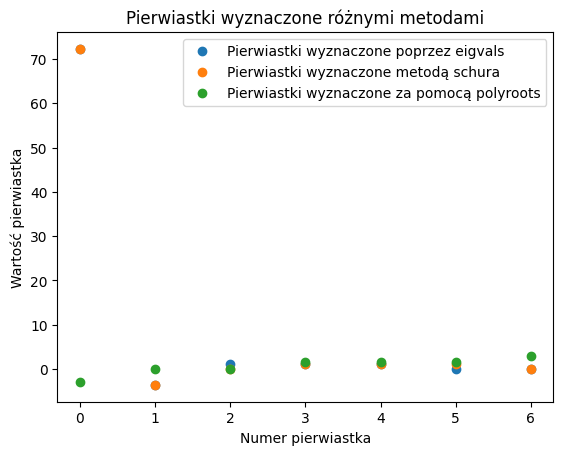

In [22]:
W2 = np.array([243, -486, 783, -990, 558, -28, -72, 16])
matrix_frobenius2, matrix_eigvals2, Q2, roots2 = frob_a(W2)
#1 
print ("Macierz frobeniusa dla W2: ")
print (matrix_frobenius2)

#2
print ("Wartości własne wyznaczone za pomocą eigvals: ")
print (matrix_eigvals2)

#3
print("Pierwiastki wyznaczone metodą schura")
print(Q2)

#4
print ("Pierwiastki wielomian wyznaczone za pomocą polyroots: ")
print (roots2)

plt.figure()
plt.plot(matrix_eigvals2,'o', label = 'Pierwiastki wyznaczone poprzez eigvals')
plt.plot(Q2,'o', label = 'Pierwiastki wyznaczone metodą schura')
plt.plot(roots2,'o', label = 'Pierwiastki wyznaczone za pomocą polyroots')
plt.title('Pierwiastki wyznaczone różnymi metodami')
plt.ylabel('Wartość pierwiastka')
plt.xlabel('Numer pierwiastka')
plt.legend()
plt.show()

Jak widać funkcja polyroots wydaje się być najbardziej wiarygodna w tym przypadku. Przy pierwiastkach wyznaczonych metodą schura powstaje błąd, który znacząco wpływa na wartość pierwiastka. Metoda, która zbliżyła się w dokładności do funkcji polyroots wydaje się być metoda wyznaczania wartości własnych przez eigvals.

***Zadanie 4.***

Skonstruuj macierz diagonalną $\mathbf{A}_n$ (użyj do tego funkcji [_diag_](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) której współczynniki $x_i = 2^i$ dla $i = \{1,2,...,n\}$ gdzie $n = \{10,20,30\}$.

1. Dla wszystkich macierzy $\mathbf{A}_n$ oblicz ich wartości własne przy użyciu [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals) i porównaj je z analitycznymi wartościami własnymi.
2. Zdefiniuj funcję _main.is_nonsingular_. Przy pomocy tej funkcji skonstruuj losowe macierze wektorów własnych $\mathbf{P}_n$ których wartości współczynników będą liczbami całkowitymi z zakresu (0,100). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze: $$\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}$$ Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
3. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortonormalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ w sposób analogiczny do macierze $\mathbf{B}_n$ używając macierzy $\mathbf{Q}_n$.  Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
4. Bazując na analitycnych wartościach własnych  dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj [macierze Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf). Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
5. Porównaj otrzymane wyniki ze wszystkich punktów i wartości $n$

Wartości własne dla n =  10 Wynoszą:  [   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
Wartości własne dla n =  20 Wynoszą:  [2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01 3.200000e+01
 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02 1.024000e+03
 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04 3.276800e+04
 6.553600e+04 1.310720e+05 2.621440e+05 5.242880e+05 1.048576e+06]
Wartości własne dla n =  30 Wynoszą:  [2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
 3.20000000e+01 6.40000000e+01 1.28000000e+02 2.56000000e+02
 5.12000000e+02 1.02400000e+03 2.04800000e+03 4.09600000e+03
 8.19200000e+03 1.63840000e+04 3.27680000e+04 6.55360000e+04
 1.31072000e+05 2.62144000e+05 5.24288000e+05 1.04857600e+06
 2.09715200e+06 4.19430400e+06 8.38860800e+06 1.67772160e+07
 3.35544320e+07 6.71088640e+07 1.34217728e+08 2.68435456e+08
 5.36870912e+08 1.07374182e+09]


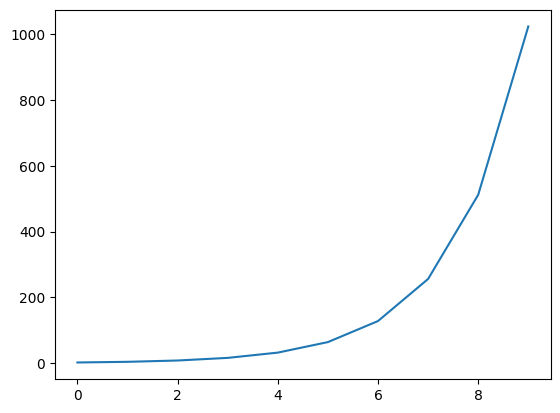

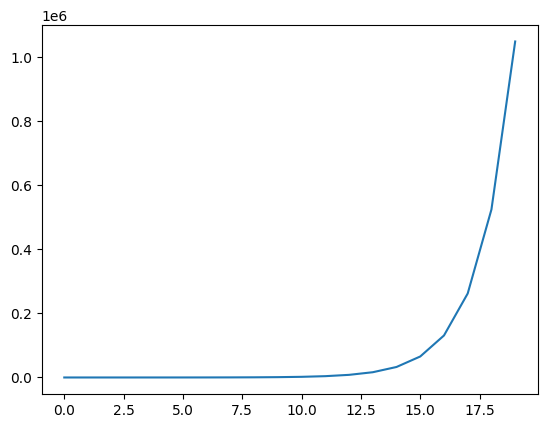

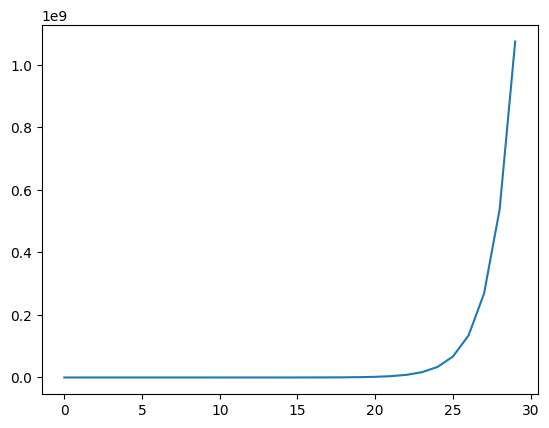

<Figure size 640x480 with 0 Axes>

In [30]:
n = [10,20,30]
A = []
for i in n:
    A.append(np.diag([2**j for j in range(1,i+1)]))
j = 0
for e in n:
    print ("Wartości własne dla n = ", e, "Wynoszą: ", np.linalg.eigvals(A[j]))
    j+= 1
